**Happy Customers Project**

**Introduction:**

This project is about developing a model that can predict customer happiness based on their responses to a survey. The survey consists of six questions that ask customers to rate their experience in various aspects of their order. The target attribute, Y, indicates whether the customer is happy (1) or unhappy (0), and the remaining attributes, X1 to X6, represent the customers' responses to the survey questions.
The goal of this project is to predict customer happiness with a 73% accuracy score or higher by using machine learning techniques. Achieving this goal will enable the company to take necessary actions to improve customer satisfaction and address the challenges they are facing during the COVID-19 pandemic.

To achieve this, we will use a subset of the data from the survey to train and validate our model. We will then use the remaining data as a private test set to evaluate the performance of our model. Additionally, we are interested in identifying which questions/features are more important when predicting a customer’s happiness. We will use a feature selection approach to determine the minimal set of attributes that would preserve the most information about the problem while increasing predictability of the data. This will help us identify any questions that we can remove in the next survey.
In conclusion, this project is crucial for our company's growth and success. By predicting customer happiness, the company can improve thier operations and make the customers even happier. In this notebook I will be presenting my findings and insights on this project.

**Section 1: Data Preprocessing**

before doing any preprocessing steps I have done some analysis on the data to get insights about the data and to know the data better before devloping the machine learning models.

we have 126 rows of data, every feature is ranging from 1 to 5 and each row is labled with binary label, happy=1 unhappy=0.

The following table show the count of every feature in the dataset:

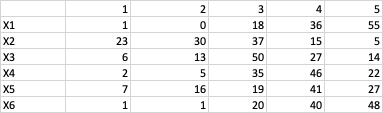

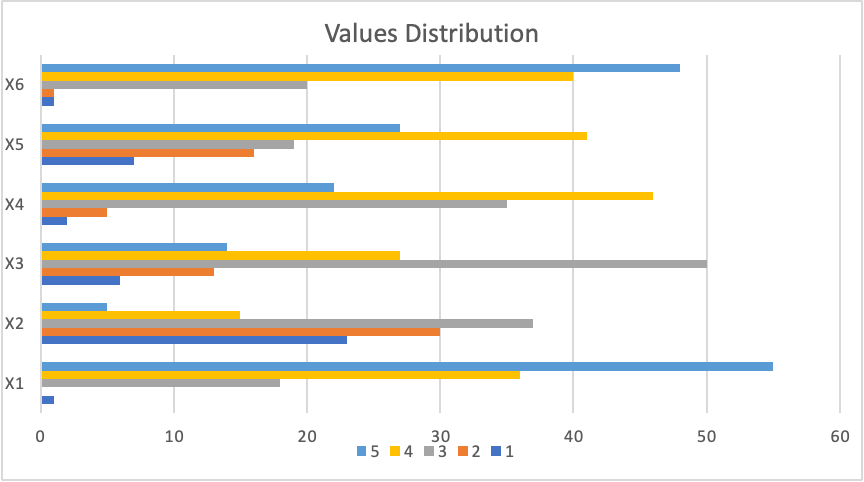



After we have done the data analysis we found some duplicate rows in the dataset, we have dealt with the duplicates by removing them.
the dataset after removing the duplicates has 110 rows of customers data.
54 of the customers were labled as unhappy whie 56 labled as happy customers.

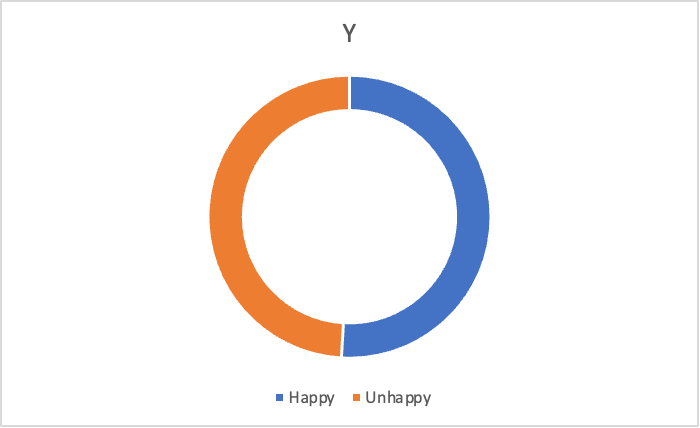


finally we plotted the data after cleaning as indicate in the following part

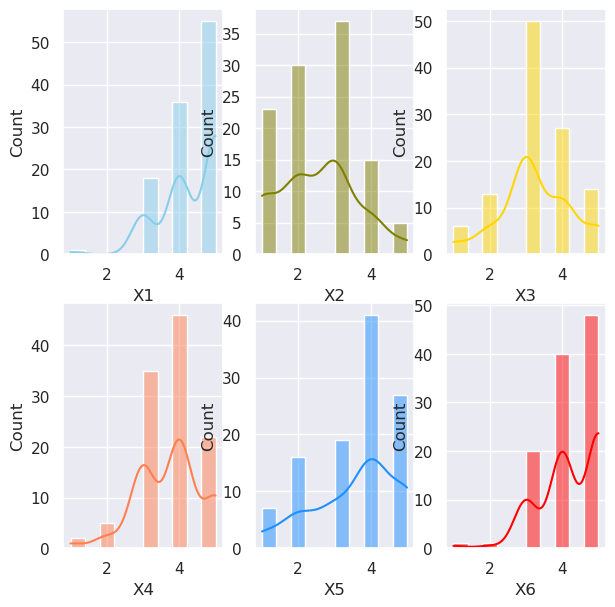

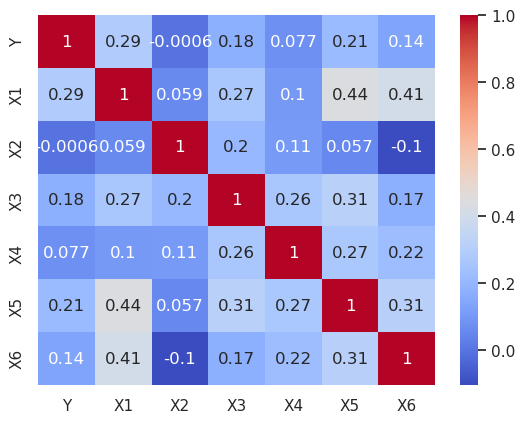

In [1]:
# libraries & dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load the data
data = pd.read_csv('/kaggle/input/acme-happiness/ACME-HappinessSurvey2020.csv')

# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")



fig, axs = plt.subplots(2, 3, figsize=(7, 7))

sns.histplot(data=data, x="X1", kde=True, color="skyblue",ax=axs[0, 0])
sns.histplot(data=data, x="X2", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=data, x="X3", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=data, x="X4", kde=True, color="Coral", ax=axs[1, 0])
sns.histplot(data=data, x="X5", kde=True, color="DodgerBlue", ax=axs[1, 1])
sns.histplot(data=data, x="X6", kde=True, color="red", ax=axs[1, 2])
plt.show()

# Compute the correlation matrix
corr = data.corr()


# Correlation heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

**Section 2: Machine Learning Models**

in this project we are working with supervised problem. So, we have splited the data into 80% for trainning and 20% for testing and trained diffrent classification models to determine which approach reveled the best results.

The follwoing table shows the evaluateion results for the used ML modles performance using accuracy, F1 score, and ROC AUC score:

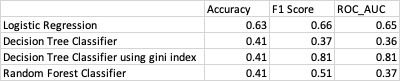

As we can see in the previous table the best accuracy achived was 63% by using logistic Regression model.
But this rtesult still below our goal of achiving more than 73% Accuracy.


In [2]:
#Logistic Regression Model Code

# import necessary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


# load the dataset
data = pd.read_csv('/kaggle/input/acme-happiness/ACME-HappinessSurvey2020.csv')

# split the dataset into training and testing sets
X = data.drop('Y', axis=1)
y = data['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a logistic regression model
model = LogisticRegression()

# train the model on the training data
model.fit(X_train, y_train)

# predict the happiness level for the testing data
y_pred = model.predict(X_test)

print('Logistic Regression Model:')
# evaluate the f1 score of the model using the top 3 features
f1 = f1_score(y_test, y_pred)
print('F1 Score:', f1)

#AUC
ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

# evaluate the accuracy of the model
accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)

Logistic Regression Model:
F1 Score: 0.6666666666666666
ROC AUC : 0.6500
Accuracy: 0.6363636363636364


**Section 3: model optimization**

In this step we decided to optimize the models by using SelectKBest method to select the top 3 features from the training data using the chi-squared statistical test.

The result of the ML models performance after optimization is indicated in the below table:

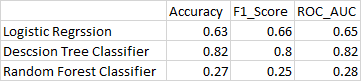

It is obvious from the previous table that the optimized decision tree classifier achieved the required accuracy target and as a result it will be used to predict the happiness level of the customers. 

In [3]:
# import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


# load the dataset
data = pd.read_csv('/kaggle/input/acme-happiness/ACME-HappinessSurvey2020.csv')

# split the dataset into training and testing sets
X = data.drop('Y', axis=1)
y = data['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# select the top 3 features using SelectKBest
selector = SelectKBest(score_func=chi2, k=3)
X_train_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)

# create a decision tree classifier model
model = DecisionTreeClassifier()

# train the model on the training data using the top 3 features
model.fit(X_train_new, y_train)

# predict the happiness level for the testing data using the top 3 features
y_pred = model.predict(X_test_new)

# evaluate the accuracy of the model using the top 3 features
accuracy = model.score(X_test_new, y_test)
print('Accuracy:', accuracy)

# evaluate the f1 score of the model using the top 3 features
f1 = f1_score(y_test, y_pred)
print('F1 Score:', f1)

#AUC
ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

Accuracy: 0.8181818181818182
F1 Score: 0.8000000000000002
ROC AUC : 0.8167


**Section 4: Dimensionality Reduction**

We will reduce the dimensionality of our dataset by using feature selection method. Feature selection will be done by`SelectKBest` from Scikit package, it is used to select the top 3 features from the training data using the chi-squared statistical test. 

In [4]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split

# load the dataset
data = pd.read_csv('/kaggle/input/acme-happiness/ACME-HappinessSurvey2020.csv')

# split the dataset into training and testing sets
X = data.drop('Y', axis=1)
y = data['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# select the top 3 features using SelectKBest
selector = SelectKBest(score_func=chi2, k=3)
X_train_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)


# print the top 3 features
feature_scores = pd.DataFrame({'Feature': X_train.columns, 'Score': selector.scores_})
top_features = feature_scores.nlargest(3, 'Score')

print('Top 3 Features from the training data using the chi-squared statistical test:')
print(top_features['Feature'].tolist())


Top 3 Features from the training data using the chi-squared statistical test:
['X5', 'X3', 'X1']


As indicated by the output of the previous code, the most 3 important features are the following:

X5 = I am satisfied with my courier.

X3 = I ordered everything I wanted to order.

X1 = my order was delivered on time.

So, it is much better to decrease the number of questions in next survey from 6 to 3 and put the most important questions that related to the customer satisfaction. 
Focusing on question X5, X3, and X1 will urge the customer to answer the questions honestly and without distraction. 
It is also important to reduce the features to the selected ones for the decision tree classifier to work and achieve the expected accuracy results.


**Conclusion**

In conclusion, this project aimed to develop a machine learning model to predict customer happiness based on their responses to a survey. The project includes data preprocessing, machine learning model selection, model optimization, and dimensionality reduction. The optimized decision tree classifier achieved the required accuracy target of 73% by selecting the top 3 features related to courier satisfaction, order fulfilment, and timely delivery. It is recommended to use these three questions in future surveys to focus on the most important aspects of customer satisfaction. The project is crucial for the company's growth and success, as predicting customer happiness can help improve operations and make customers even happier.